# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


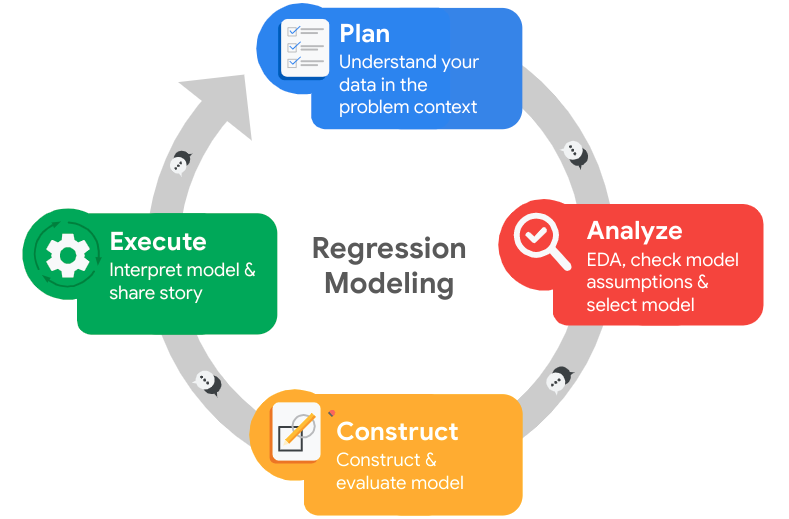

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: `what’s likely to make the employee leave the company?`

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

-  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
pd.set_option('display.max_columns', None)
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours': 'average_monthly_hours', 
                    'time_spend_company': 'tenure',
                    'Work_accident': 'work_accident',
                    'Department': 'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

np.int64(3008)

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicates = df0[df0.duplicated()]
duplicates.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


It seems very unlikely that two employees self-reported the exact same response for all 10 columns.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

Text(0.5, 1.0, 'Boxplot of Tenure')

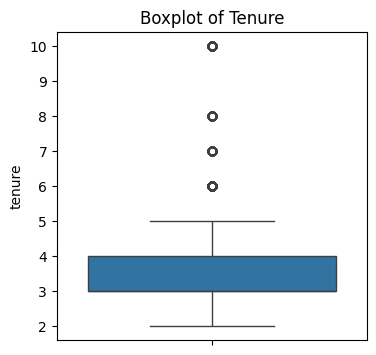

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(4,4))
g = sns.boxplot(df1['tenure'])
g.set_title('Boxplot of Tenure')

The boxplot above shows that there are outliers in the `tenure` variable. Check the number of rows that contain outliers below.

In [12]:
df1['tenure'].describe()

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tenure, dtype: float64

In [13]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
def find_outliers(df, column_name):
    # Calculate 25th percentile
    percentile25 = df[column_name].quantile(0.25)
    # Calculate 75th percentile
    percentile75 = df[column_name].quantile(0.75)
    # Calculate interquartile range
    iqr = percentile75 - percentile25
    # Calculate upper and lower thresholds for outliers
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    # Identify outliers
    outliers = df[(df[column_name] < lower_limit) | (df[column_name] > upper_limit)]

    print("Lower limit:", lower_limit)
    print("Upper limit:", upper_limit)
    print("Number of rows in the data containing outliers in 'tenure':", outliers.shape[0])


In [14]:
find_outliers(df1, 'tenure')

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in 'tenure': 824


In [15]:
# outliers percentage
print('Tenure outliers percentage:', (824 / df1.shape[0])*100,'%')

Tenure outliers percentage: 6.8718205320657155 %


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

Logistic regression is sensitive to outliers, while tree-based models are not.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True) * 100)

left
0    10000
1     1991
Name: count, dtype: int64

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [17]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

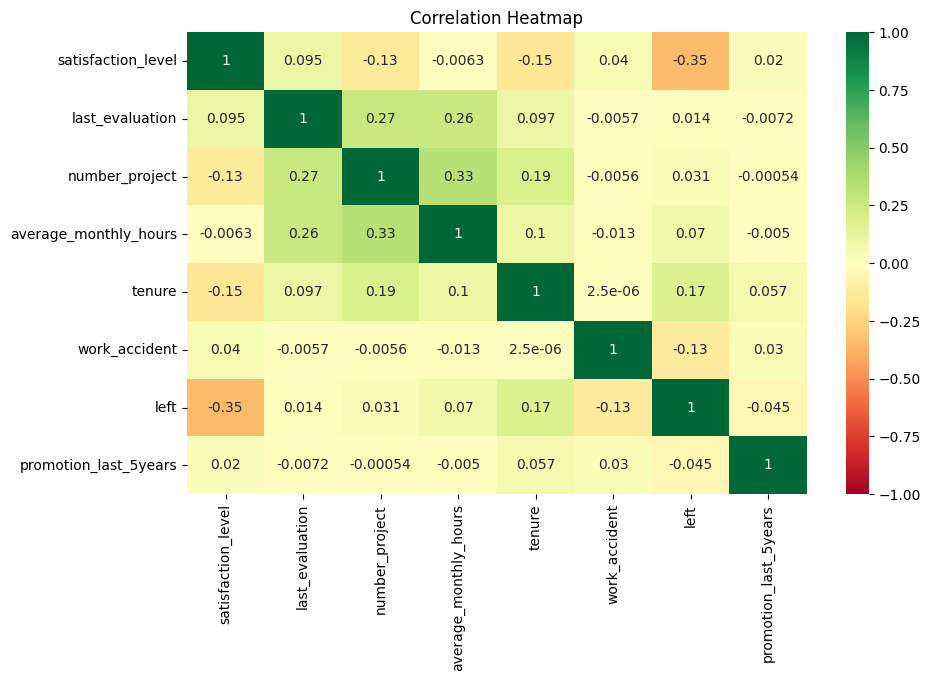

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Calculating correlation matrix for numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows that the number of projects, monthly working hours and evaluation scores all have positive correlation with each other. Whether an employee leaves is negatively correlated with their satisfaction level.

Text(0.5, 1.0, 'Tenure Histogram')

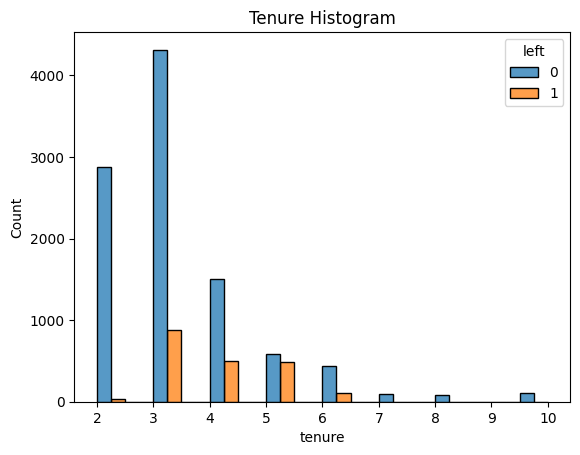

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', binwidth=0.5)
plt.title('Tenure Histogram')

Observations:
- The histogram above shows that there are relatively fewer long-tenured employees, possibly they are those with higher-ranking and higher-paid.

Text(0.5, 1.0, 'Boxplot of Satisfaction Level by Tenure')

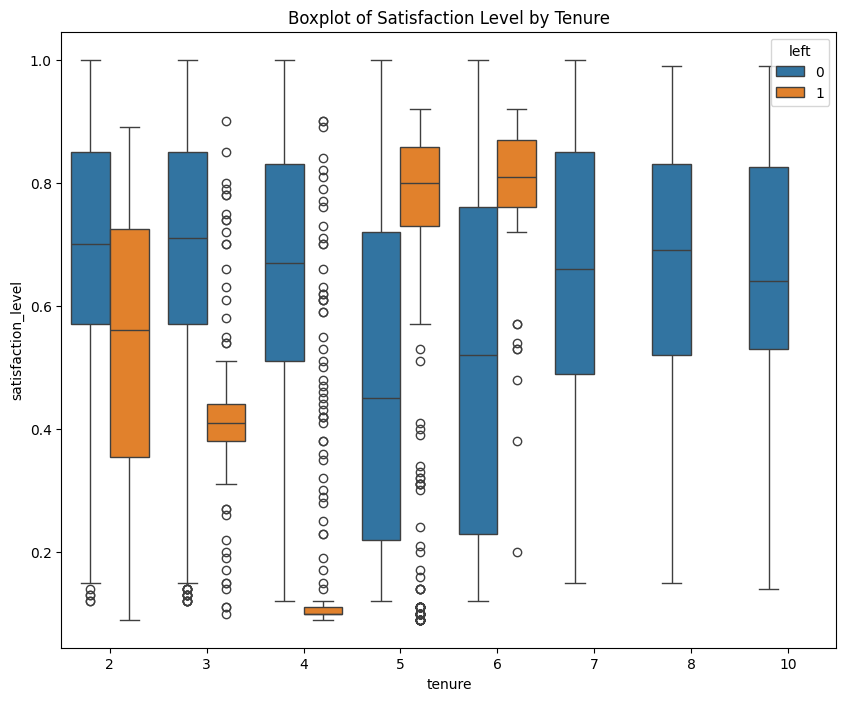

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(10, 8))
sns.boxplot(data=df1, x='tenure', y='satisfaction_level', hue='left')
plt.title('Boxplot of Satisfaction Level by Tenure')

Observations:
- Leavers are made up of two general categories: dissatisfied employees with short tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level.
- Employees with the longest tenures didn't leave and their satisfaction levels aligned with those newer stayed employeees.

In [21]:
# Check the mean and median of the satisfaction levels
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

C:\Users\eexia\AppData\Local\Temp\ipykernel_4268\3430732653.py:2: FutureWarning: The provided callable <function mean at 0x0000028E63617740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])
C:\Users\eexia\AppData\Local\Temp\ipykernel_4268\3430732653.py:2: FutureWarning: The provided callable <function median at 0x0000028E63735DD0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, left employees score lower than stayed employees.

Text(0.5, 1.0, 'Monthly Hours by Turnover')

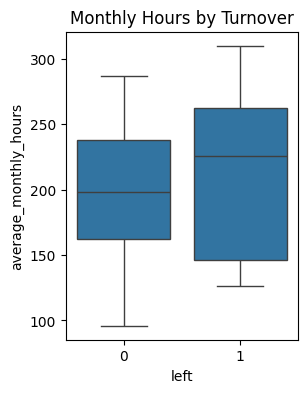

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(3,4))
sns.boxplot(data=df1, x='left', y='average_monthly_hours')
plt.title('Monthly Hours by Turnover')

In [23]:
df1.groupby(['left'])['average_monthly_hours'].agg([np.mean,np.median])

C:\Users\eexia\AppData\Local\Temp\ipykernel_4268\2006907663.py:1: FutureWarning: The provided callable <function mean at 0x0000028E63617740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['average_monthly_hours'].agg([np.mean,np.median])
C:\Users\eexia\AppData\Local\Temp\ipykernel_4268\2006907663.py:1: FutureWarning: The provided callable <function median at 0x0000028E63735DD0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['average_monthly_hours'].agg([np.mean,np.median])


,mean,median
left,,
0,198.94270,198.0
1,208.16223,226.0


Observations:

Data shows a positive correlation between `left` and `average_monthly_working_hours`. Leavers averagely work about 208 hours per month, compared to 200 hours for stayers. 

Assume a work week of 42 hours (Monday to Friday) and two weeks of annual leave per year, the average number of working hours per month `= 50 weeks * 40 hours per week / 12 months = 175 hours per month`. This suggests an unsustainable work-life balance that is likely driving talent away.

Next, check the distribution of the number of projects.

Text(0.5, 1.0, 'Number of Projects Histogram')

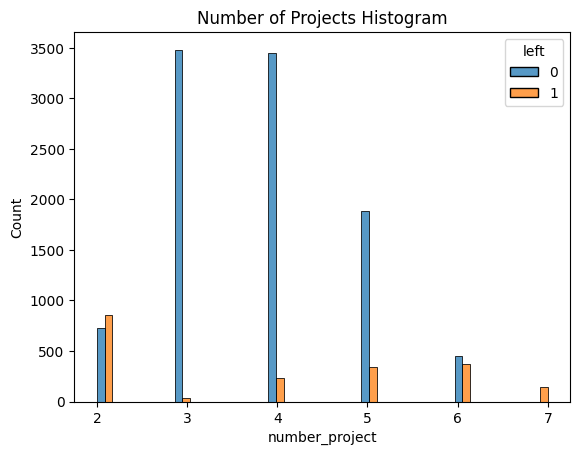

In [24]:
# Create a plot as needed 
### YOUR CODE HERE ###
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge')
plt.title('Number of Projects Histogram')

Text(0.5, 1.0, 'Monthly Hours by Number of Projects')

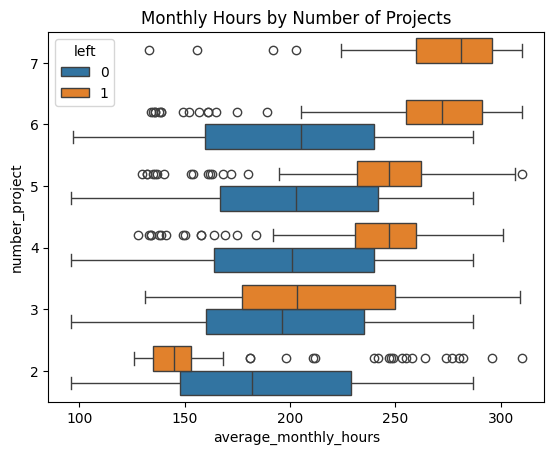

In [25]:
# Create a plot as needed 
### YOUR CODE HERE ###
ax = sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h')
ax.invert_yaxis()
plt.title('Monthly Hours by Number of Projects')

Observations:

Apparently, people who work on more projects would also work longer (the mean hours of each group increase with the number of projects). However, two groups of leavers were observed: (a) those who worked much less than their peers with the same number of projects, (b) those who worked much more.
- Of those in (a), it is possible that they were fired. For those in (b), it is reasonable to infer that they probably quit, due to being exhausted by the heavy workload and long working hours.
- Most notably, all employees with seven projects left the company, with an interquartile range about 255 to 295 hours/month, much more than the other groups.
- The optimal number of projects for retention seem to be 3 and 4, as the ratio of left/stayed is very small.

By taking the 175 working hours per month as a reference, this means that, except employees who worked on two projects, every group worked more than this. It seems that employees here are overworked.

Next, check whether there is a correlation between working long hours and receiving high evaluation scores.

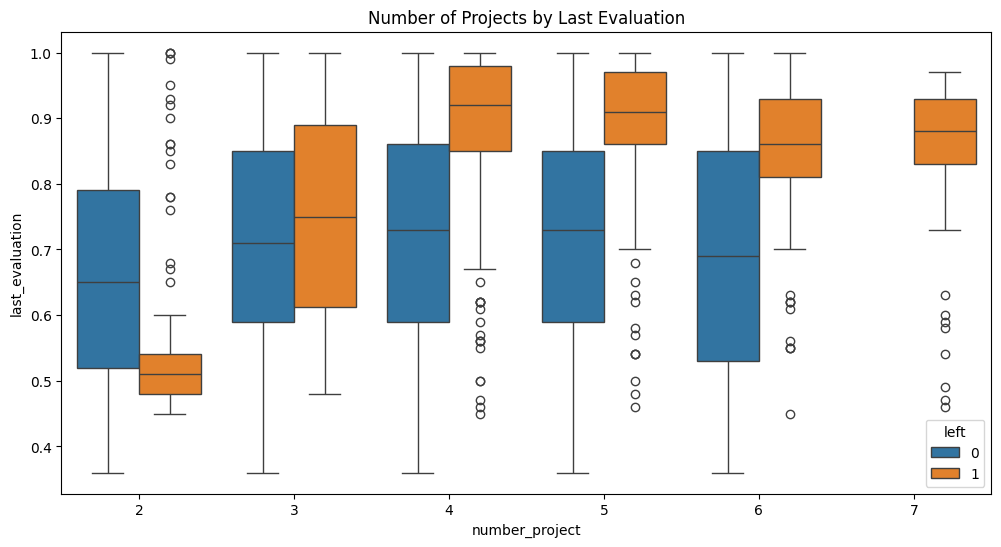

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='number_project', y='last_evaluation', hue='left')
plt.title('Number of Projects by Last Evaluation')
plt.show()

Observations:

The boxplots look similar to the previous `Monthly Hours by Number of Projects` boxplots. There seems to be a correlation between the hours worked and evaluation.

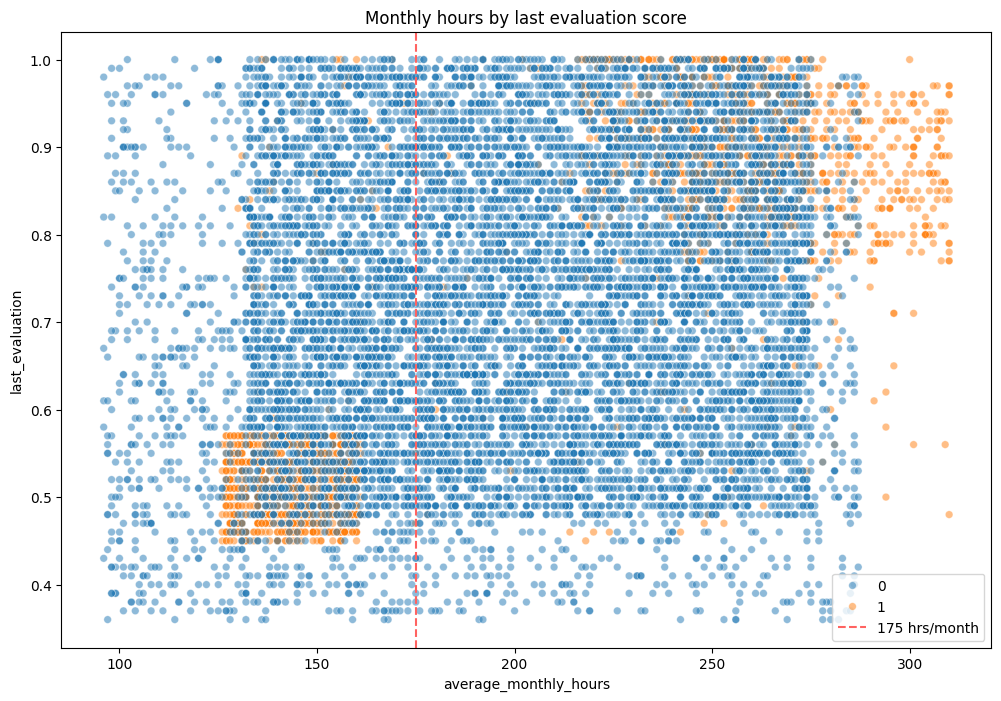

In [27]:
# Create a plot as needed 
### YOUR CODE HERE ###
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.5, s=30)
plt.axvline(x=175, color='#ff6361', label='175 hrs/month', ls='--')
plt.legend()
plt.title('Monthly hours by last evaluation score')

plt.show()

Observations:
- The scatterplot indicates two categories of leavers: overworked employees who well-performed (top right) and employees who worked under the standard 176 monthly avarage hours with lower evaluation scores (bottom left).
- Apparently, most of the employees in this company work much over 175 hours per month. However, working long hours does not guarentee a high evaluation score.

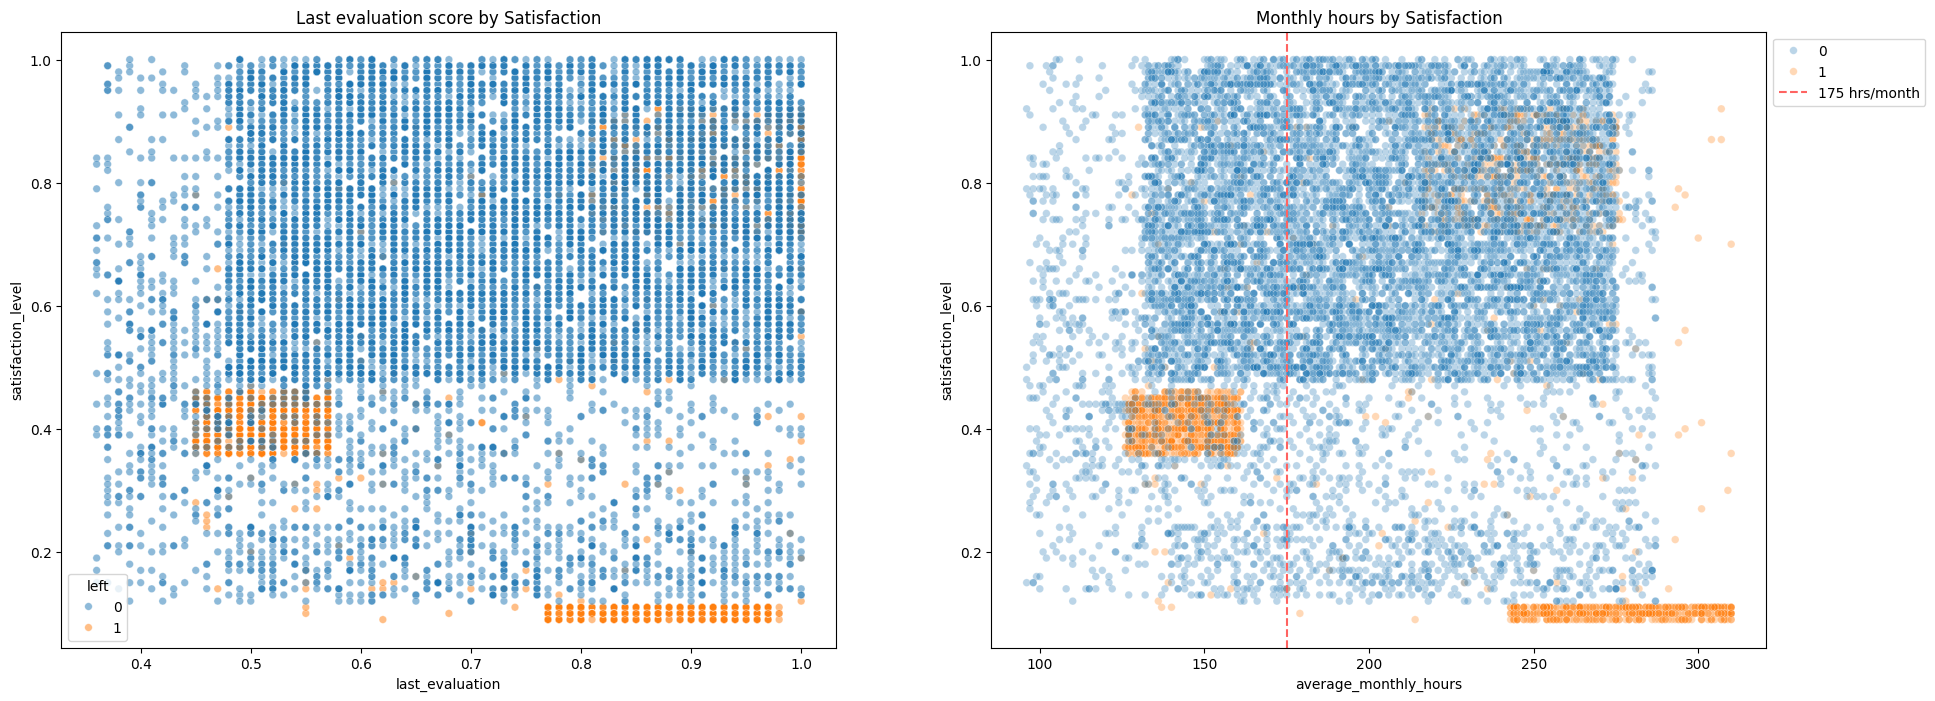

In [28]:
# Create a plot as needed 
### YOUR CODE HERE ###
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create scatterplot of `last_evaluation` vs `satisfaction_level`
sns.scatterplot(data=df1, y='satisfaction_level', x='last_evaluation', hue='left', alpha=0.5, s=30, ax=ax[0])
ax[0].set_title('Last evaluation score by Satisfaction')

# Create scatterplot of `average_monthly_hours` vs `satisfaction_level`
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.3, s=30, ax=ax[1])
ax[1].axvline(x=175, color='#ff6361', label='175 hrs/month', ls='--')
ax[1].set_title('Monthly hours by Satisfaction')

# Place the legend specifically on the second axis
# Use 'loc' to ensure it doesn't overlap your data
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Observations:

There is a distinct cluster of leavers who had high evaluation scores were disproportionately dissatisfied. This group of employees worked significantly more than the 175 hours monthly benchmark.

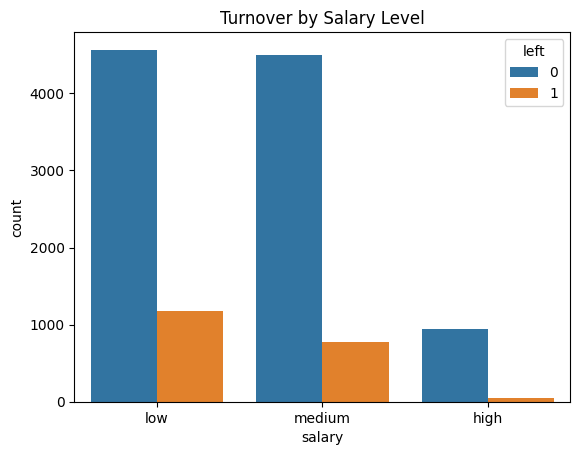

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data=df1, x='salary', hue='left', order=['low', 'medium', 'high'])
plt.title('Turnover by Salary Level')
plt.show()

There is a negative correlation between `left` and `salary`. While it is expected that higher-paid employees leave less often, the high volume of departures in the low and medium salary brackets is concerning. When paired with the high working hours, this suggests that Salifort Motor's compensation may not be competitive enough to justify the current workload, leading employees to seek better "effort-to-pay" ratios elsewhere.

Next, examine salary levels for different tenures.

Text(0.5, 1.0, 'Salary histogram by tenure')

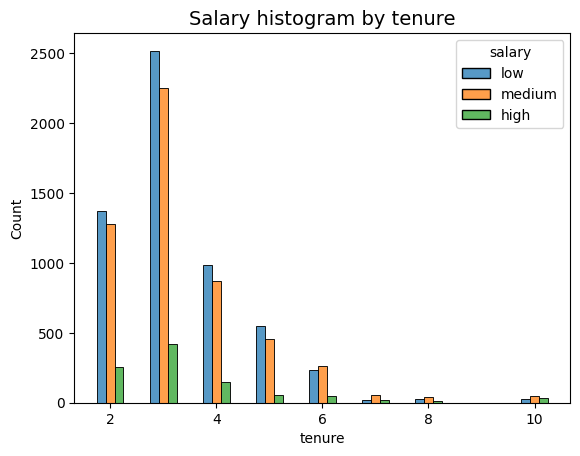

In [30]:
# Create a plot as needed 
### YOUR CODE HERE ###
# Plot short-tenured histogram
sns.histplot(data=df1, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5)
plt.title('Salary histogram by tenure', fontsize='14')

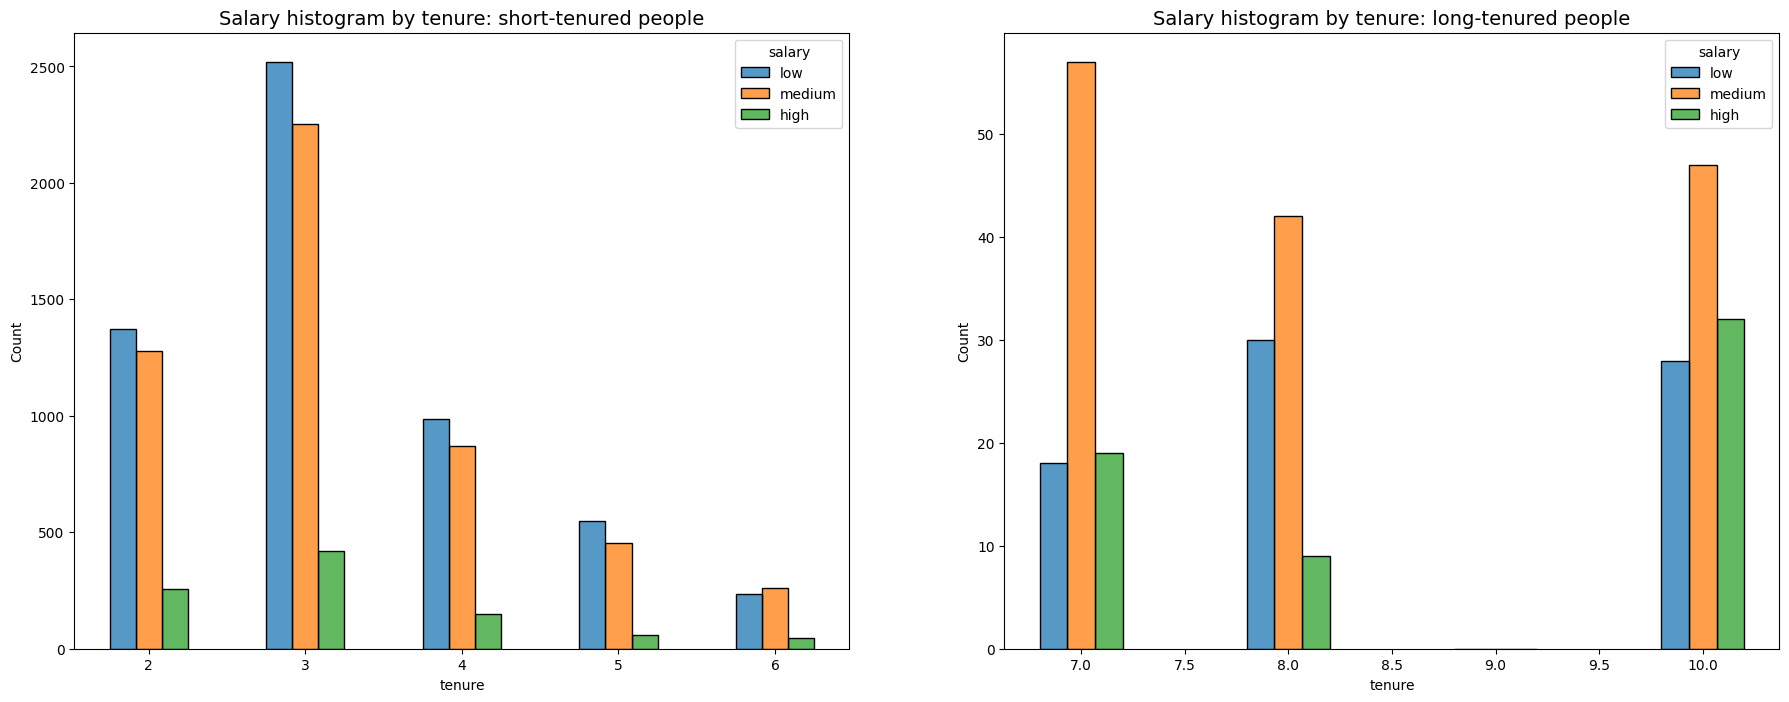

In [31]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not just comprised of higher-paid employees.

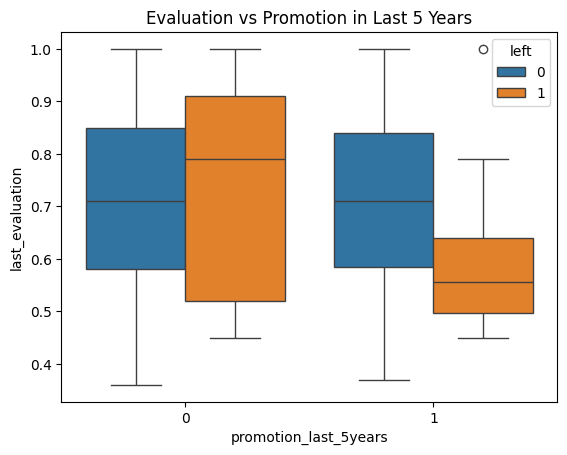

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data=df1, x='promotion_last_5years', y='last_evaluation', hue='left')
plt.title('Evaluation vs Promotion in Last 5 Years')
plt.show()

Something strange was observed from the boxplots above. 

Among employees who were not promoted, leavers had higher median evaluations than stayers. On the other hand, among employees who had given a promotion but still left had lower evaluations.

This suggests that Salifort Motors is failing to promote its best people. When a high-performer is crushed with 7 projects and sees no path for advancement (no promotion), they have no incentive to stay.

Furthermore, check how the leavers are distributed across departments.

In [33]:
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

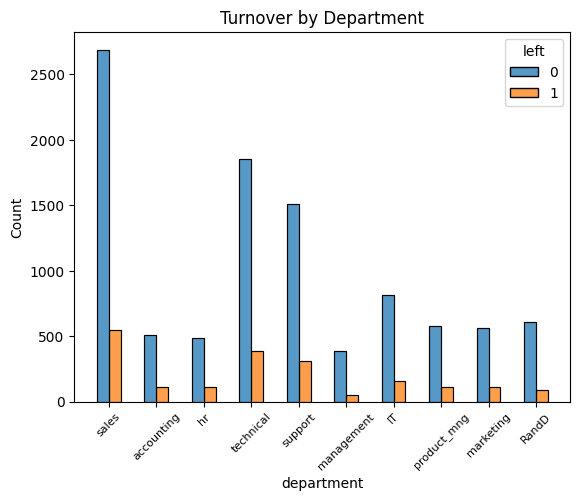

In [34]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
sns.histplot(data=df1, x='department', hue='left', multiple='dodge',
             shrink=0.5)
plt.xticks(rotation=45, fontsize=8)
plt.title('Turnover by Department');


There does not seem to be any department that differs significantly in its proportion of leavers to stayers.

### Insights

It seems that the employees are leaving the company as a result of poor management. Leaving is tied to `long working hours`, `many projects` and `low satisfaction levels`. In addition, it can be ungratifying to work long hours and receive good evaluation scores, but not receive promotions. There is a group of employees at this company who are probably burned out.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classification: To predict the binary categorical outcome variable `left`, i.e., whether an employee leaves the company.

### Identify the types of models most appropriate for this task.

Linear Regression
- Is designed to predict a continuous numerical value.
- We are trying to predict a category (0 = Stayed, 1 = Left). This is a Classification problem.

Naive Bayes 
- It assumes that all your features are independent of each other.
- In this case, features are heavily correlated. For example, number_project and average_monthly_working_hours are likely linked. If the model assumes they have nothing to do with each other, it will lose the "story" you found in EDA.

K-Means
- K-Means is not a predictive model. It is an unsupervised learning algorithm used for clustering, not classification.
- It doesn't look at the `left` column. Instead, it groups employees together based on how similar they are (like "employee personas")

#### Logistic Regression

Encode the non-numneric variables.

In [35]:
# salary: has an an order (Low < Medium < High)
df2 = df1.copy()
df2['salary'] = df2['salary'].map({'low': 0, 'medium': 1, 'high': 2})

In [36]:
# department: dummy encode since it is categorical without order
df2 = pd.get_dummies(df2, columns=['department'], drop_first=False)

In [37]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Create another heatmap focus on the selected variables.

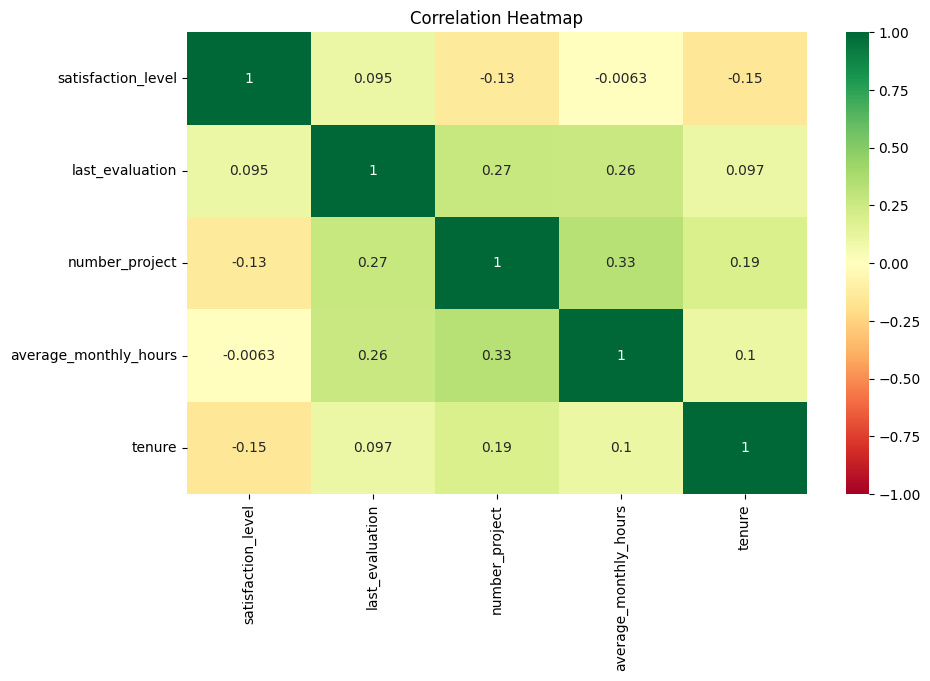

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(df2[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']].corr(), 
            annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Remove the outliers in `tenure` column, since logistic regression is sensitive to outliers.

In [39]:
df_logreg = df2[(df2['tenure']>= df2['tenure'].quantile(0.25)) & (df2['tenure']<= df2['tenure'].quantile(0.75))]

Split the `df_logreg`.

In [40]:
# Select all columns except the outcome variable
X = df_logreg.drop(columns=['left'], axis=1) 

# Select only the outcome variable
y = df_logreg['left']

In [41]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=100)

In [42]:
from sklearn.preprocessing import StandardScaler

# 2. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
# 3. Fit the model
log_clf = LogisticRegression(random_state=100, max_iter=500).fit(X_train_scaled, y_train)
log_clf

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",100
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mult

In [44]:
# Output the coefficients with features names
pd.DataFrame(X.columns, columns=['Feature']).assign(Coefficients=log_clf.coef_[0]).set_index('Feature')

,Coefficients
Feature,
satisfaction_level,-2.883485
last_evaluation,-0.311678
number_project,-0.785937
average_monthly_hours,0.035256
tenure,-0.128394
work_accident,-0.426842
promotion_last_5years,-0.113429
salary,-0.422347
department_IT,0.016050


In [45]:
log_clf.intercept_  # Intercept (bias) term

array([-3.48675691])

Use the logistic model to predict on the test dataset.

In [46]:
y_pred = log_clf.predict(X_test)
y_pred

c:\Users\eexia\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 0, 0, ..., 0, 0, 0], shape=(1799,))

Check the class balance again.

In [47]:
df_logreg['left'].value_counts(normalize=True) * 100

left
0    80.972898
1    19.027102
Name: proportion, dtype: float64

In [48]:
print(metrics.classification_report(y_test, y_pred, target_names=['Stay', 'Leave']))

              precision    recall  f1-score   support

        Stay       0.82      0.90      0.86      1457
       Leave       0.30      0.19      0.23       342

    accuracy                           0.76      1799
   macro avg       0.56      0.54      0.54      1799
weighted avg       0.72      0.76      0.74      1799



The classification report above shows that the logistic regression model achieved a precision of 72%, a recall of 76%, a f1-score of 74% (all weighted average) and an accuracy of 76%.

However, as it is more important to predict employees who leave, then the scores are significantly lower (30%, 19% and 23%).

In [49]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.761534
Precision: 0.297674
Recall: 0.187135
F1 Score: 0.229803


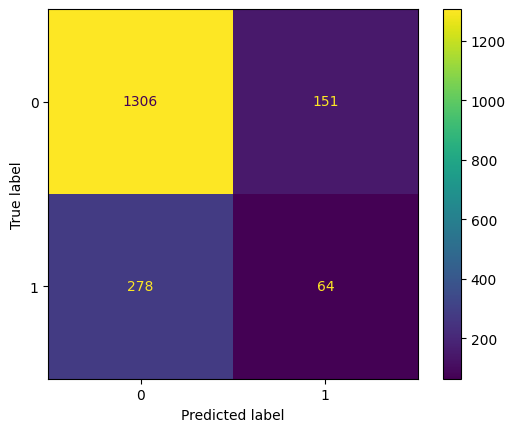

In [50]:
log_cm = metrics.confusion_matrix(y_test, y_pred, labels = log_clf.classes_)
log_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = log_cm,display_labels = log_clf.classes_)
log_disp.plot()

The confusion matrix is made up of:

| True Negatives  | False Positives |
|-----------------|-----------------|
| Fasle Negatives | True Positives  |


True negatives: The number of people who did not leave, and the model accurately predicted did not leave.

False positives: The number of people who did not leave, but the model inaccurately predicted as leaving.

False negatives: The number of people who left, but the model inaccurately predicted did not leave.

True positives: The number of people who left, and the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

#### Tree-based Models

Random forest/XGBoost do not care about linearity at all. They use splits instead of a formula. 

I will start with a simple Decision Tree to visualize the splits, then move to Random Forest/XGBoost for performance.

##### Decision Tree

Decision trees require no assumptions regarding the distribution of underlying data and do not require scaling of features.


In [51]:
from sklearn.tree import DecisionTreeClassifier
# This function displays the splits of the tree
from sklearn.tree import plot_tree

In [52]:
X = df2.drop(columns=['left'], axis=1) 
y = df2['left']

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=100)

Construct a decision tree model and set up cross-validated grid-search to search for the best model parameters.

In [53]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=100)

# Fit the model to training data
decision_tree.fit(X_train, y_train)

# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

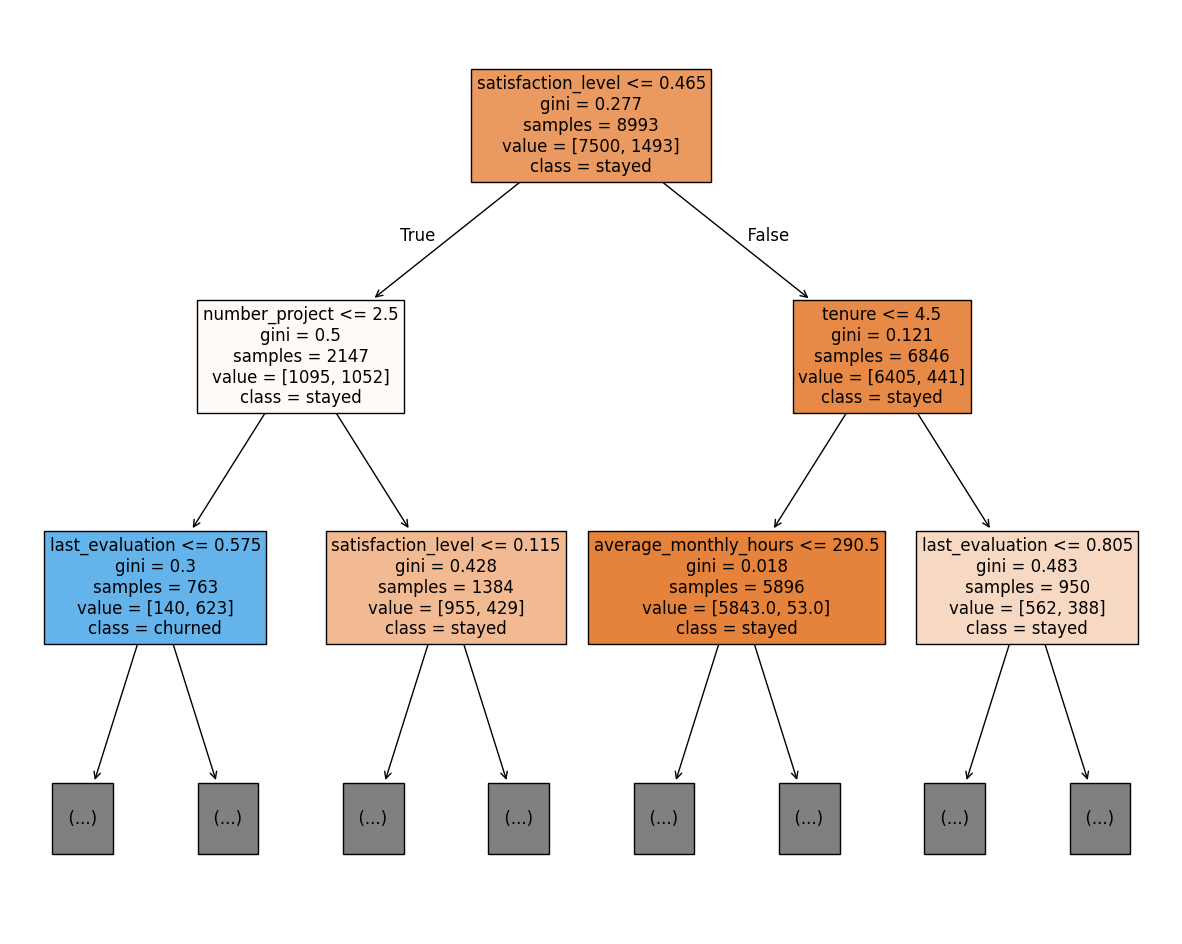

In [54]:
# Plot the tree
plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=2, fontsize=12, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

In [55]:
dcs_tree_table = pd.DataFrame({
    'Model': ['Decision Tree (on test data)'],
    'F1': [metrics.f1_score(y_test, dt_pred)],
    'Recall': [metrics.recall_score(y_test, dt_pred)],
    'Precision': [metrics.precision_score(y_test, dt_pred)],
    'Accuracy': [metrics.accuracy_score(y_test, dt_pred)],
    'AUC': [metrics.roc_auc_score(y_test, dt_pred)]
}).round(6)
dcs_tree_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Decision Tree (on test data),0.904858,0.89759,0.912245,0.968646,0.940195


Use StratifiedKFold as the dataset is imbalance.

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [58]:
# Tune and Validate
# Assign a dictionary of hyperparameters to search over
tree_para = {'max_depth':[3,4,5,6,7,8,9,10,15,20,30,40,50, None],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50],
             'min_samples_split': [2,3,4,5,6]
             }
# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
# Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state = 100)
# Instantiate the GridSearch
dcs_tree = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=100),
                   refit="roc_auc")

In [59]:
%%time
# Fit the model
dcs_tree.fit(X_train, y_train)

CPU times: total: 1min 37s
Wall time: 1min 40s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...dom_state=100)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [3, 4, ...], 'min_samples_leaf': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.","['accuracy', 'precision', ...]"
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",'roc_auc'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computatio

In [59]:
import pickle

In [60]:
path = "C:/Users/eexia/Desktop/HQ/03_Coursera/Google Advanced Data Analytics/7Google Advanced Data Analytics Capstone/Salifort-Motors-Employee-Turnover-Prediction/"

Define functions to pickle and read in the model.

In [100]:
def write_pickle(path, model_object, filename):
    with open(path + filename + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [61]:
def read_pickle(path, filename):
    with open(path + filename + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [64]:
write_pickle(path, dcs_tree, 'dcs_tree')

In [62]:
dcs_tree = read_pickle(path, 'dcs_tree')

In [63]:
dcs_tree.best_params_ 

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [64]:
# Best average AUC score across different folds and all the combinations of hyperparameters
dcs_tree.best_score_

np.float64(0.9751054753727939)

This is a strong AUC score, which shows that this tuned decision tree model can predict employees who will leave very well. 

Summarise them in a table.

In [65]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'Model': [model_name],
                          'Precision': [precision],
                          'Recall': [recall],
                          'F1': [f1],
                          'Accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

In [66]:
# Call the function on our model
result_table = pd.concat([dcs_tree_table, make_results("Tuned Decision Tree", dcs_tree, 'auc')]
                         ).sort_values(by=['AUC'], ascending=False)

In [67]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Tuned Decision Tree,0.913531,0.906882,0.920859,0.971533,0.975105
0,Decision Tree (on test data),0.904858,0.897590,0.912245,0.968646,0.940195


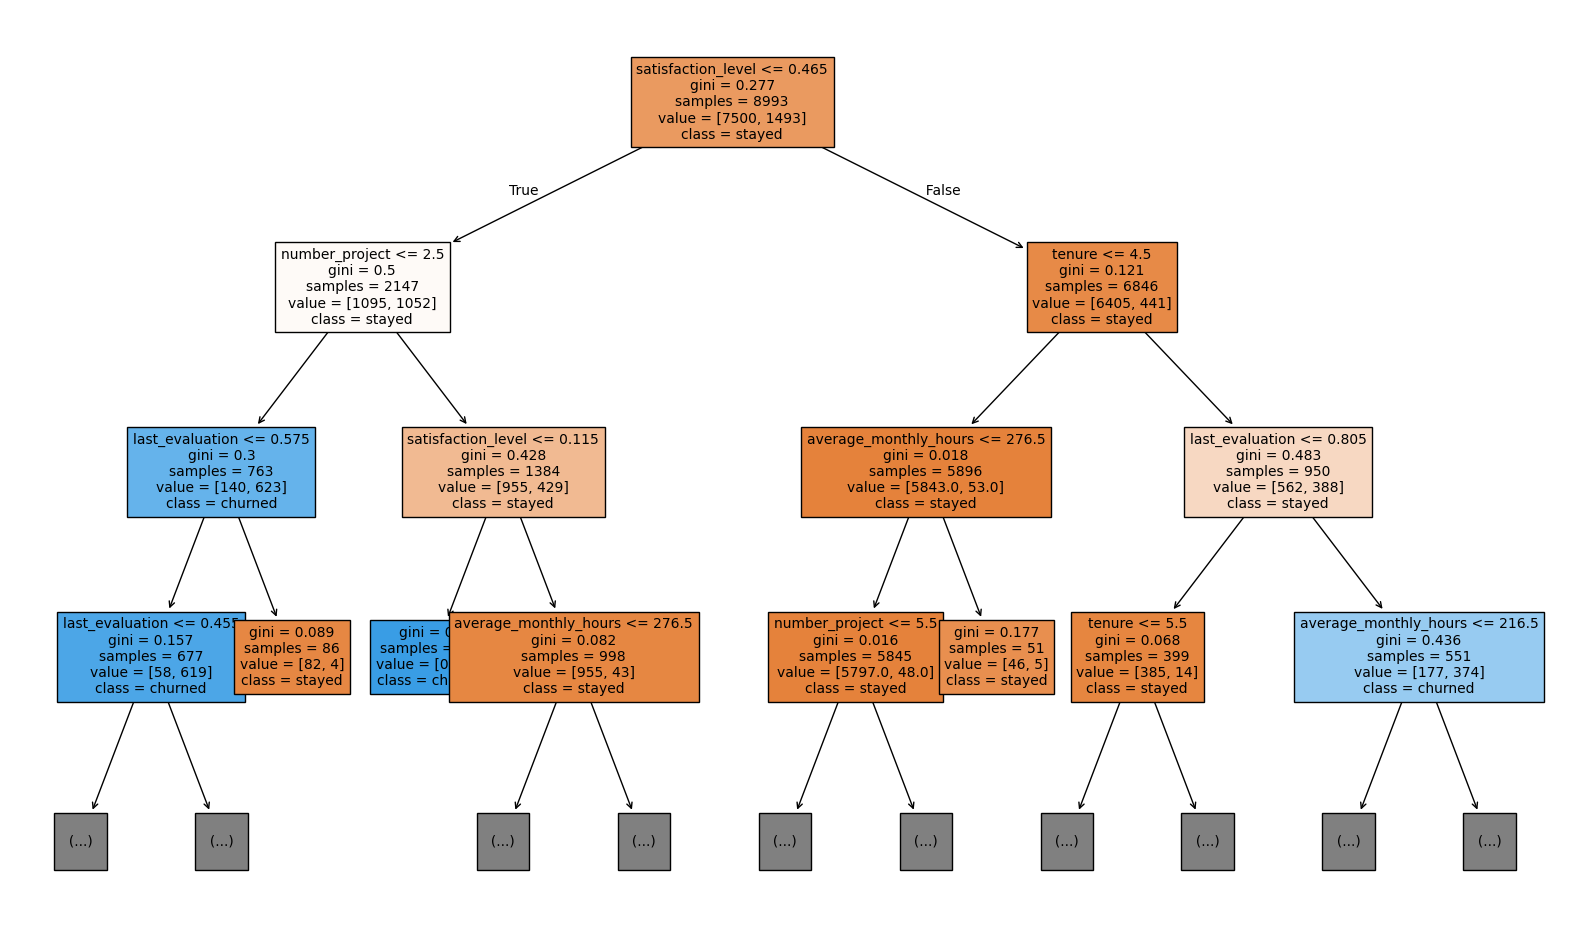

In [68]:
# Best decision trtee
plt.figure(figsize=(20,12))
plot_tree(dcs_tree.best_estimator_, max_depth = 3, fontsize=10, feature_names=X.columns, 
          class_names={0:'stayed', 1:'churned'}, filled=True);
plt.show()

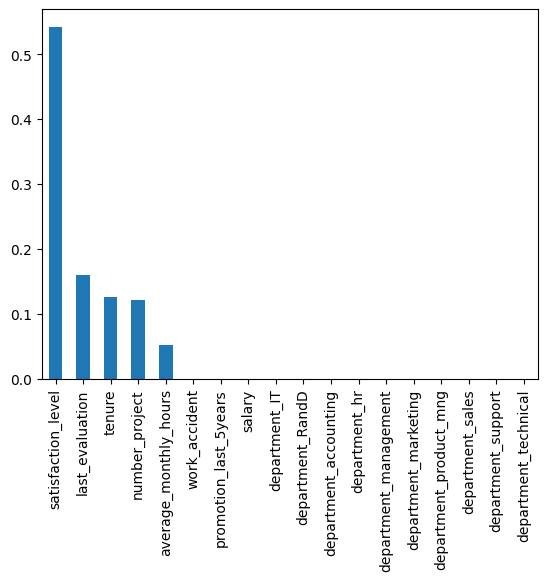

In [69]:
# Calculate feature importances
# importances = decision_tree.feature_importances_
importances = dcs_tree.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

The top five most important features from the tuned decision tree model are `satisfaction_level`, `last_evaluation`, `tenure`, `number_projecdt` and `average_monthly_hours`.

##### Random Forest

Decision trees can be vulnerable to overfitting. Random forests avoid overfitting by incorporating multiple trees to make predictions.

In [70]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(random_state=100)
cv_params = {'max_depth': [3,5,7, None], 
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [3,4,5,6, None],
             'n_estimators': [300, 500]
             }  
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

rf_cv = GridSearchCV(rf, cv_params, scoring=scoring,
                    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=100), 
                    refit='roc_auc', n_jobs=-1, verbose=1)

In [87]:
%%time
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


c:\Users\eexia\AppData\Local\Programs\Python\Python314\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: total: 14.2 s
Wall time: 8min 51s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...dom_state=100)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [3, 5, ...], 'max_features': [3, 4, ...], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.","['accuracy', 'precision', ...]"
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",'roc_auc'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messa

In [88]:
write_pickle(path, rf_cv, 'rf_cv')

In [72]:
rf_cv = read_pickle(path, 'rf_cv')

In [73]:
# Best average AUC score across different folds and all the combinations of hyperparameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 6,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [74]:
# Best average F1 score
rf_cv.best_score_ 

np.float64(0.9810200032921073)

In [75]:
result_table = pd.concat([result_table, make_results("Random Forest CV", rf_cv, 'auc')]
                         ).sort_values(by=['AUC'], ascending=False)

In [76]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Forest CV,0.947270,0.914922,0.982090,0.983097,0.981020
0,Tuned Decision Tree,0.913531,0.906882,0.920859,0.971533,0.975105
0,Decision Tree (on test data),0.904858,0.897590,0.912245,0.968646,0.940195


The evaluation scores of the random forest model are better than those of the decision tree model. This indicates that the random forest model outperforms the decision tree model.

The top five most important features from the random forest cross-validation model are `satisfaction_level`, `number_project`, `tenure`, `average_monthly_hours` and `last_evaluation`.

In [77]:
# Create separate validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, 
                                            stratify=y_train, random_state=100)

In [78]:
from sklearn.model_selection import PredefinedSplit

In [79]:
# Create list of split indices
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
# Save time by setting cv to custom_split
custom_split = PredefinedSplit(test_fold=split_index)

rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=custom_split, refit='roc_auc', n_jobs=-1, verbose=1)

In [83]:
%%time
rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 720 candidates, totalling 720 fits


c:\Users\eexia\AppData\Local\Programs\Python\Python314\Lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: total: 4.83 s
Wall time: 1min 52s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...dom_state=100)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [3, 5, ...], 'max_features': [3, 4, ...], 'max_samples': [0.7, 1.0], 'min_samples_leaf': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.","['accuracy', 'precision', ...]"
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",'roc_auc'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.","PredefinedSpl...hape=(8993,)))"
,"verbose verbose: intControls the verbosity: the higher, the more mes

In [82]:
write_pickle(path, rf_val, 'rf_val')

In [84]:
rf_val = read_pickle(path, 'rf_val')

In [85]:
rf_val.best_params_

{'max_depth': None,
 'max_features': 6,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [86]:
result_table = pd.concat([result_table, make_results("Random Forest Validated", rf_val, 'auc')]
                         ).sort_values(by=['AUC'], ascending=False)

In [87]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Forest Validated,0.947368,0.916890,0.979943,0.983104,0.984222
0,Random Forest CV,0.947270,0.914922,0.982090,0.983097,0.981020
0,Tuned Decision Tree,0.913531,0.906882,0.920859,0.971533,0.975105
0,Decision Tree (on test data),0.904858,0.897590,0.912245,0.968646,0.940195


By using a separated validation dataset, it requires a shorter time to train the model. The random forest validated model mostly outperforms the random forest cross-validation model, with the exception of precision (approximately 0.002 lower, which is a negligible amount).

##### XGBoost

In [88]:
from xgboost import XGBClassifier, plot_importance

In [89]:
# Perform a binary classification task that outputs a logistic probability
xgb = XGBClassifier(objective='binary:logistic', random_state=100) 

cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [300, 500],
             'subsample': [0.7],
             'colsample_bytree': [0.7]}    

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, 
                      cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=100), 
                      refit='roc_auc', n_jobs=-1, verbose=1)

In [123]:
%%time
xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
CPU times: total: 5.16 s
Wall time: 31.6 s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2, ...], 'max_depth': [4, 5, ...], 'min_child_weight': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.","['accuracy', 'precision', ...]"
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",'roc_auc'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedKFo... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the mor

In [124]:
write_pickle(path, xgb_cv, 'xgb_cv')

In [98]:
xgb_cv = read_pickle(path, 'xgb_cv')

In [91]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 300,
 'subsample': 0.7}

In [92]:
result_table = pd.concat([result_table, make_results("XGBoost CV", xgb_cv, 'auc')]
                         ).sort_values(by=['AUC'], ascending=False)

In [93]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Forest Validated,0.947368,0.916890,0.979943,0.983104,0.984222
0,XGBoost CV,0.942742,0.921616,0.964906,0.981429,0.982842
0,Random Forest CV,0.947270,0.914922,0.982090,0.983097,0.981020
0,Tuned Decision Tree,0.913531,0.906882,0.920859,0.971533,0.975105
0,Decision Tree (on test data),0.904858,0.897590,0.912245,0.968646,0.940195


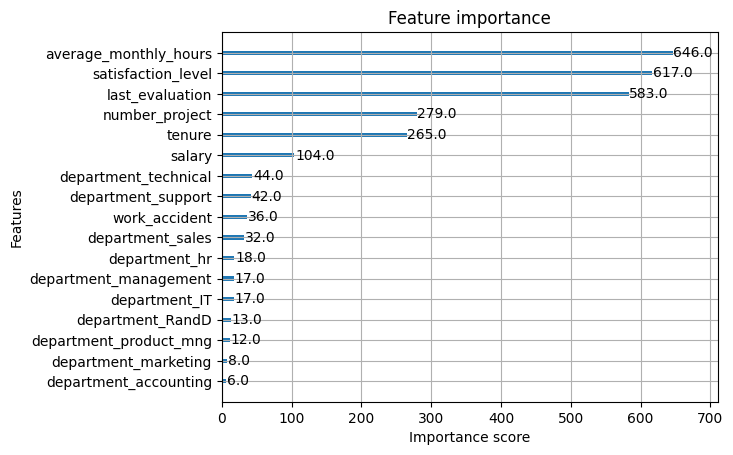

In [94]:
plot_importance(xgb_cv.best_estimator_);

In [95]:
xgb_val = GridSearchCV(xgb, cv_params, scoring=scoring, 
                       cv=custom_split, refit='roc_auc', 
                       n_jobs=-1, verbose=1)

In [99]:
%%time
xgb_val.fit(X_train, y_train)

Fitting 1 folds for each of 150 candidates, totalling 150 fits
CPU times: total: 2.3 s
Wall time: 5.49 s


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBClassifier...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2, ...], 'max_depth': [4, 5, ...], 'min_child_weight': [1, 2, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.","['accuracy', 'precision', ...]"
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",'roc_auc'
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.","PredefinedSpl...hape=(8993,)))"
,"verbose verbose: intControls the verbosity: the higher, the m

In [101]:
write_pickle(path, xgb_val, 'xgb_val')

In [102]:
xgb_val = read_pickle(path, 'xgb_val')

In [103]:
xgb_val.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 300,
 'subsample': 0.7}

In [104]:
result_table = pd.concat([result_table, make_results("XGBoost Validated", xgb_val, 'auc')]
                         ).sort_values(by=['AUC'], ascending=False)

In [105]:
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,XGBoost Validated,0.948229,0.932976,0.963989,0.983104,0.987524
0,Random Forest Validated,0.947368,0.916890,0.979943,0.983104,0.984222
0,XGBoost CV,0.942742,0.921616,0.964906,0.981429,0.982842
0,Random Forest CV,0.947270,0.914922,0.982090,0.983097,0.981020
0,Tuned Decision Tree,0.913531,0.906882,0.920859,0.971533,0.975105
0,Decision Tree (on test data),0.904858,0.897590,0.912245,0.968646,0.940195


#### Champion Model

The XGBoost 3-way split model is chosen to be the champion model. Its evaluation scores are mostly better than all the other models, with the exception of precision score being slightly lower than the first runner-up.

The XGBoost Validated model will be used to test on the final test data.

In [106]:
# Retrain on full training data for final model 
# as previously was trained on a separate training set
xgb_val_opt = xgb_val.best_estimator_
xgb_val_opt.fit(X_train, y_train)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,0.7
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_metho

In [107]:
# Predict on test data using xgb_val_opt model
xgb_val_pred = xgb_val_opt.predict(X_test)

print('F1 score final XGB model: ', metrics.f1_score(y_test, xgb_val_pred))
print('Recall score final XGB model: ', metrics.recall_score(y_test, xgb_val_pred))
print('Precision score final XGB model: ', metrics.precision_score(y_test, xgb_val_pred))
print('Accuracy score final XGB model: ', metrics.accuracy_score(y_test, xgb_val_pred))
print('AUC score final XGB model: ', metrics.roc_auc_score(y_test, xgb_val_pred))

F1 score final XGB model:  0.944963655244029
Recall score final XGB model:  0.9136546184738956
Precision score final XGB model:  0.978494623655914
Accuracy score final XGB model:  0.9823215476984657
AUC score final XGB model:  0.9548273092369478


In [108]:
def get_scores(model_name:str, model, X_test, y_test):
    y_pred = model.best_estimator_.predict(X_test)

    auc = metrics.roc_auc_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)

    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'AUC': [auc]})
    return table

In [109]:
pd.concat([get_scores("XGBoost Validated Test", xgb_val, X_test, y_test), 
           make_results("XGBoost Validated", xgb_val, 'auc')])

,Model,F1,Recall,Precision,Accuracy,AUC
0,XGBoost Validated Test,0.944964,0.913655,0.978495,0.982322,0.954827
0,XGBoost Validated,0.948229,0.932976,0.963989,0.983104,0.987524


While the AUC and Recall scores decreased slightly by approximately 0.03 on the test set, they remain exceptionally high. Since these results were achieved on an isolated holdout set, I am confident that this 3-way split (Train/Val/Test) XGBoost model has successfully generalised the underlying patterns of turnover without overfitting to the training data.

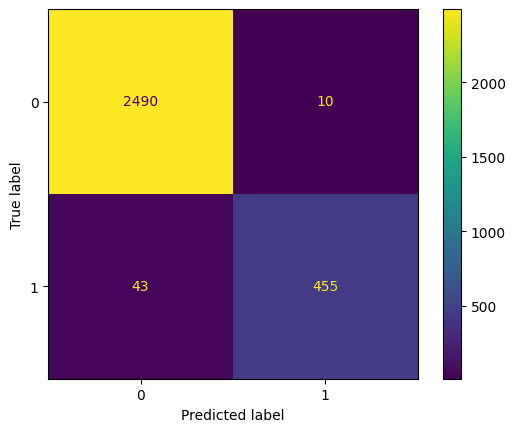

In [108]:
cm = metrics.confusion_matrix(y_test, xgb_val_pred, labels = xgb_val.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = xgb_val.classes_)
disp.plot()

0.9548273092369478

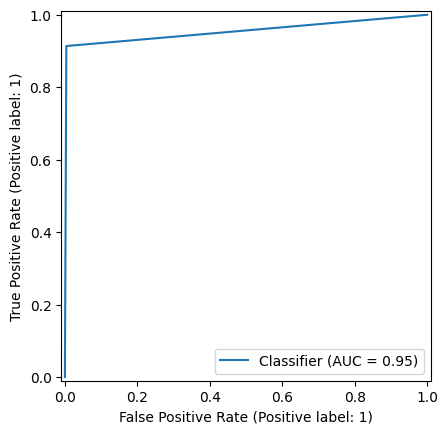

In [109]:
# Plot the ROC curve
metrics.RocCurveDisplay.from_predictions(y_test, xgb_val_pred)
# Area Under the Curve (AUC) score
metrics.roc_auc_score(y_test, xgb_val_pred)

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 72%, recall of 76%, f1-score of 74% (all weighted average) and an accuracy of 76% on the test set.

However, as it is more important to predict employees who leave, then the scores are significantly lower (30%, 19% and 23%).

**Tree-based Machine Learning**

Th 3-way split XGBoost model outperformed the other tree-based models, achieved AUC of 95.5%, f1-score of 94.5%, recall of 91.4%, precision of 97.8% and accuracy of 98.2% on a final unseen test set.

- AUC-ROC: An AUC of 95.5% is considered "Excellent". It means that the model has a 95% chance of correctly distinguishing between a randomly selected "leaver" (positive class) and a randomly selected "stayer" (negative class).

From the 2998 employees in the test holdout set, there are 465 customers who left the company (1). Of those, our model captures 455. The confusion matrix indicates that, when the model makes an error, it’s usually a Type II error&mdash;it gives a false negative by failing to predict that an employee will leave. On the other hand, it makes far fewer Type I errors, which are false positives.

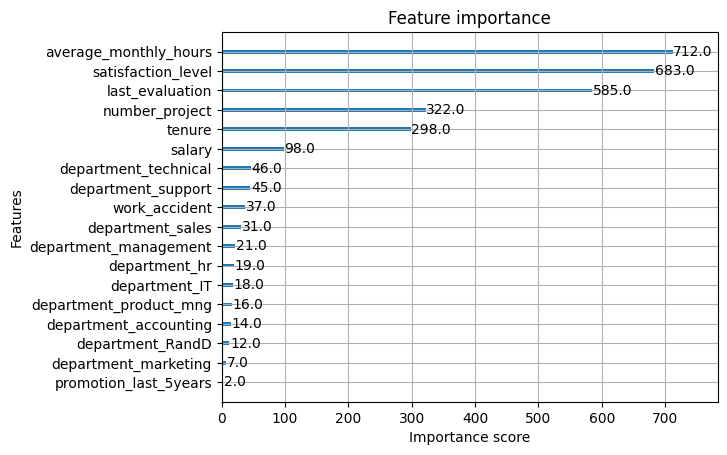

In [111]:
plot_importance(xgb_val_opt);

This tells us that the five most important features used by our model were `average_monthly_hours`, `satisfaction_level`, `last_evaluation`, `number_project` and `tenure`. This is very useful information. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

For future investigation, we could try building a K-means model on this data and analyzing the clusters. This may yield valuable insight.  

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.